In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [87]:
dic_data_A = {'n': 100 ,'mean': (2,4), 'cov' :((1,0.9),(0.9,2)), 'y' : 0 }  # RED
dic_data_B = {'n': 120 ,'mean': (4,1), 'cov' :((3,0.8),(0.8,1)), 'y' : 1 }  # BLUE
dic_data = {'A': dic_data_A, 'B' : dic_data_B }

# We sample the points with numpy.random
np.random.seed(1)
samples = {key : np.random.multivariate_normal(dic['mean'], np.array(dic['cov']), dic['n']) 
           for key,dic in dic_data.items()}
     
X_orig = np.concatenate(tuple(samples[key] for key in dic_data.keys() ),axis=0)
Y = np.concatenate(tuple(dic['y']* np.ones(dic['n'], dtype='int') 
                         for key,dic in dic_data.items() ), axis=0)



# We transform into coordinates in the plane to make plotting easier.
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 150*np.eye(3)[[0,2,1]][np.array(Y,dtype='int')]
]


In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
X_orig[:,0] *= 100


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_orig)

X = X_pca

sc = StandardScaler()
X_sc = sc.fit_transform(X_orig)

pca = PCA(n_components=2)
X_pca_sc = pca.fit_transform(X_sc)

X_sc_pca = sc.fit_transform(X_pca)

X = X_sc_pca

In [93]:
np.sign(-3)

-1

In [104]:
def plot_quick(ax,X,title='PCA'):
    x0 = X[:,0]
    x1 = X[:,1]
    x0_range = (min(x0),max(x0))
    l0 = x0_range[1]-x0_range[0]
    x0_range = (min(x0)-l0/20,max(x0)+l0/20)
    x1_range = (min(x1),max(x1))
    l1 = x1_range[1]-x1_range[0]
    x1_range = (min(x1)-l1/20,max(x1)+l1/20)
    ax.set_xlim(x0_range)
    ax.set_ylim(x1_range)
    # TRAIN
    ax.scatter(x0, x1, s = 17, 
              alpha=1, c=colors )
    ax.set_title(title)
    ax.figure.canvas.draw()
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles, labels)
#     ax.legend()
    return None

<IPython.core.display.Javascript object>


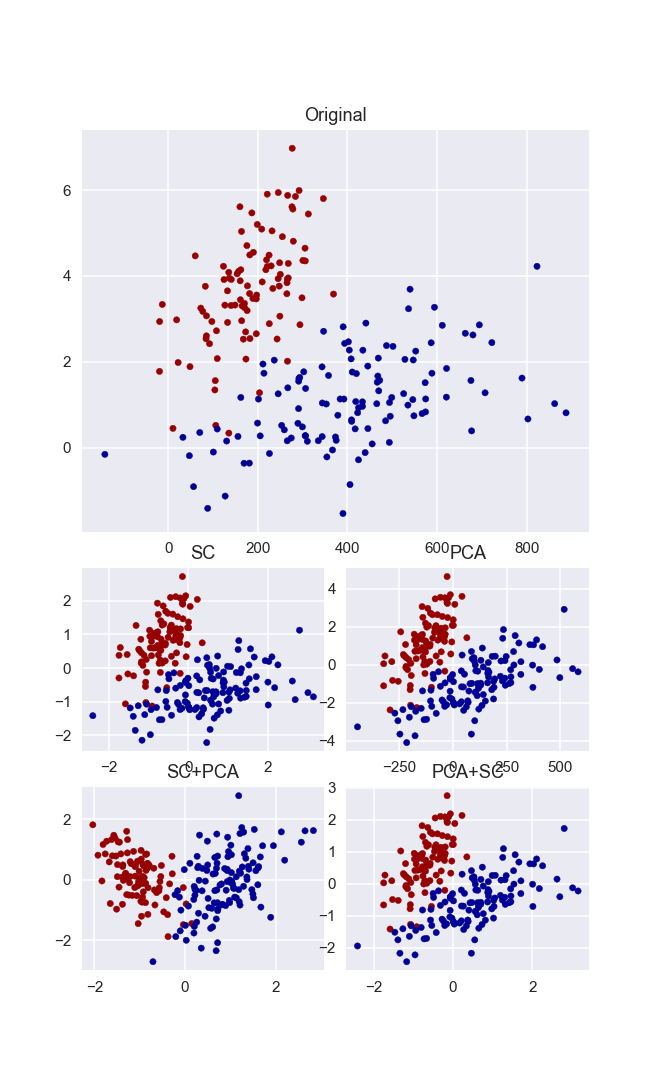

In [114]:
%matplotlib notebook
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(6,10))
grid = plt.GridSpec(4, 4)  # 2 rows 3 cols
ax0 = plt.subplot(grid[:2, :])  # top 2 x 2
ax1 = plt.subplot(grid[2, :2])   # top left
ax2 = plt.subplot(grid[2, 2:])  # top right
ax3 = plt.subplot(grid[3, :2]) # bottom left
ax4 = plt.subplot(grid[3, 2:]) # bottom right

X = X_orig
plot_quick(ax0,X,title='Original')

X = X_sc
plot_quick(ax1,X,title='SC')

X = X_pca
plot_quick(ax2,X,title='PCA')

X = X_pca_sc
plot_quick(ax3,X,title='SC+PCA')

X = X_sc_pca
plot_quick(ax4,X,title='PCA+SC')


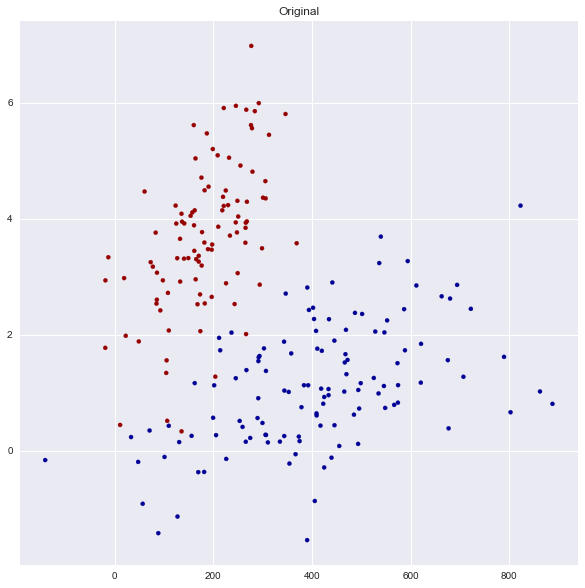

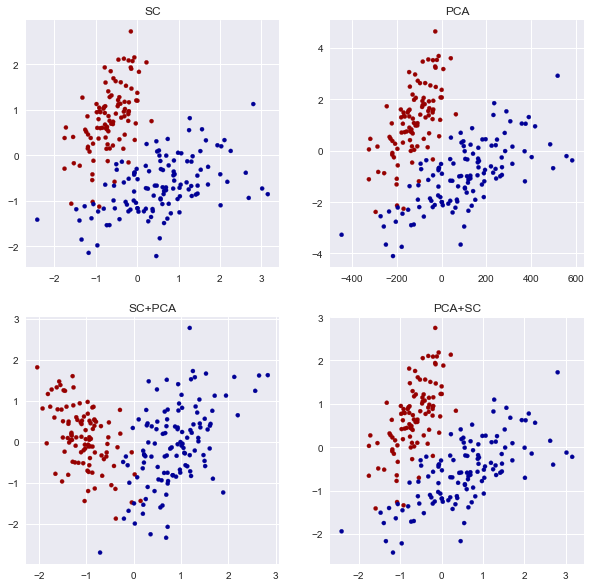

In [106]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,10))
axes = fig.subplots(1,1)

X = X_orig
plot_quick(axes,X,title='Original')

fig = plt.figure(figsize=(10,10))
axes = fig.subplots(2,2)
sc = StandardScaler()
X_sc = sc.fit_transform(X_orig)

X = X_sc
plot_quick(axes[0,0],X,title='SC')

X = X_pca
plot_quick(axes[0,1],X,title='PCA')

X = X_pca_sc
plot_quick(axes[1,0],X,title='SC+PCA')

X = X_sc_pca
plot_quick(axes[1,1],X,title='PCA+SC')